In [70]:
import pandas as pd
import numpy as np
from plotly import express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d as m3d



In [71]:
df = pd.read_csv('audio_features.csv', sep=',')
print(len(df))
df = df.drop_duplicates()
print(len(df))
df.dropna(subset=["item","genre","id","name","artist","danceability","energy","key","mode","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"], inplace=True)

154835
154835


In [72]:
df.head(10)

,item,genre,id,name,artist,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0,A Cappella,4hObp5bmIJ3PP3cKA9K9GY,Don't Worry Be Happy,Bobby McFerrin,0.675,0.166,11,1,-22.602,0.1710,0.8800,0.000071,0.0461,0.747,68.837,294400
1,1,A Cappella,0HZk0QsXPhMNAWNDR3rYE8,Hallelujah,Pentatonix,0.364,0.378,7,0,-7.381,0.0331,0.4700,0.000000,0.3390,0.366,89.918,268960
2,2,A Cappella,2mgPmzcrz3sBCR7AvCr6mE,Trebles Finals: Bright Lights Bigger City/Magic,The Treblemakers,0.577,0.525,9,0,-7.196,0.2250,0.2140,0.000000,0.1030,0.410,113.055,154147
3,3,A Cappella,07o54snAilKYHsW8bGFe9x,Bellas Finals: Price Tag/Don’t You (Forget Abo...,The Barden Bellas,0.486,0.694,0,1,-5.800,0.1410,0.5740,0.000000,0.1250,0.248,109.410,216413
4,4,A Cappella,0phwM5a6TdLBDl0F9bk5fl,Riff Off: Mickey/Like A Virgin/Hit Me With You...,The Barden Bellas,0.571,0.499,11,1,-5.515,0.4040,0.5540,0.000000,0.0908,0.755,126.434,224267
5,5,A Cappella,5mkoR8mVrEwpDQc9y54sM2,Sea Shanty Medley,Home Free,0.561,0.692,4,1,-5.710,0.0551,0.2530,0.000000,0.1250,0.898,140.554,234362
6,6,A Cappella,2BFWptzKzwH3pY5Rqvy1Wm,Pool Mashup: Just The Way You Are/Just A Dream,The Barden Bellas,0.552,0.301,6,1,-7.280,0.0330,0.9160,0.000056,0.0712,0.642,110.257,98933
7,7,A Cappella,7j8FDy7eI1TommLedXXdHz,Creep,Pentatonix,0.333,0.379,3,1,-10.545,0.0414,0.2260,0.000000,0.0902,0.132,102.236,147000
8,8,A Cappella,0ZFeVCKCMCXUQ1TKVd2azW,The Sound of Silence,Pentatonix,0.439,0.430,9,1,-7.432,0.0273,0.1600,0.000000,0.3680,0.260,90.990,212637
9,9,A Cappella,1klGbW5a9qTBFUjFfddbmU,Can't Sleep Love,Pentatonix,0.730,0.433,2,1,-7.050,0.0455,0.0849,0.000000,0.1690,0.572,94.596,173053


In [73]:
df1=df[["id","danceability","energy","key","mode","loudness","speechiness","acousticness","instrumentalness","valence","tempo"]]

In [74]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df1[["danceability","energy","key","mode","loudness","speechiness","acousticness","instrumentalness","valence","tempo"]])

In [75]:
df_normalized = pd.DataFrame(X_normalized, columns=["danceability","energy","key","mode","loudness","speechiness","acousticness","instrumentalness","valence","tempo"])

In [76]:
pca = PCA(n_components=10)

In [77]:
pca.fit(X_normalized)

PCA(n_components=10)

In [78]:
pca.explained_variance_ratio_

array([0.29256262, 0.13998837, 0.11743405, 0.097626  , 0.09248562,
       0.08586169, 0.0781365 , 0.04993108, 0.03240112, 0.01357295])

In [79]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29256262, 0.43255099, 0.54998504, 0.64761104, 0.74009666,
       0.82595835, 0.90409485, 0.95402593, 0.98642705, 1.        ])

In [80]:
X_pca = pca.transform(X_normalized)

In [81]:
kmeans = KMeans(n_clusters=4, n_init=10)

In [82]:
kmeans.fit(X_pca)

KMeans(n_clusters=4)

In [83]:
X_pca

array([[ 2.51490504, -3.07706695,  0.73143352, ...,  0.38259167,
         0.97684341, -0.47543324],
       [ 0.99497869,  0.08335395,  1.07297334, ...,  0.36845254,
        -0.2396083 ,  0.69802893],
       [-0.48284871, -0.37702413,  1.80736918, ..., -0.17455917,
         0.16608614,  0.51734696],
       ...,
       [-1.67828764,  0.27037247, -0.6626437 , ...,  0.72034426,
         0.51415785, -0.07909119],
       [-1.1015709 , -1.82816715, -1.06089844, ..., -0.17129224,
         0.92559244, -0.42149351],
       [-1.0733633 , -1.62691065,  1.24667896, ...,  0.70925815,
         0.98756114, -0.10837147]])

In [84]:
cluster_ids = kmeans.predict(X_pca)

In [85]:
cluster_distances = kmeans.transform(X_pca)

In [86]:
cluster_distances = kmeans.transform(X_pca)

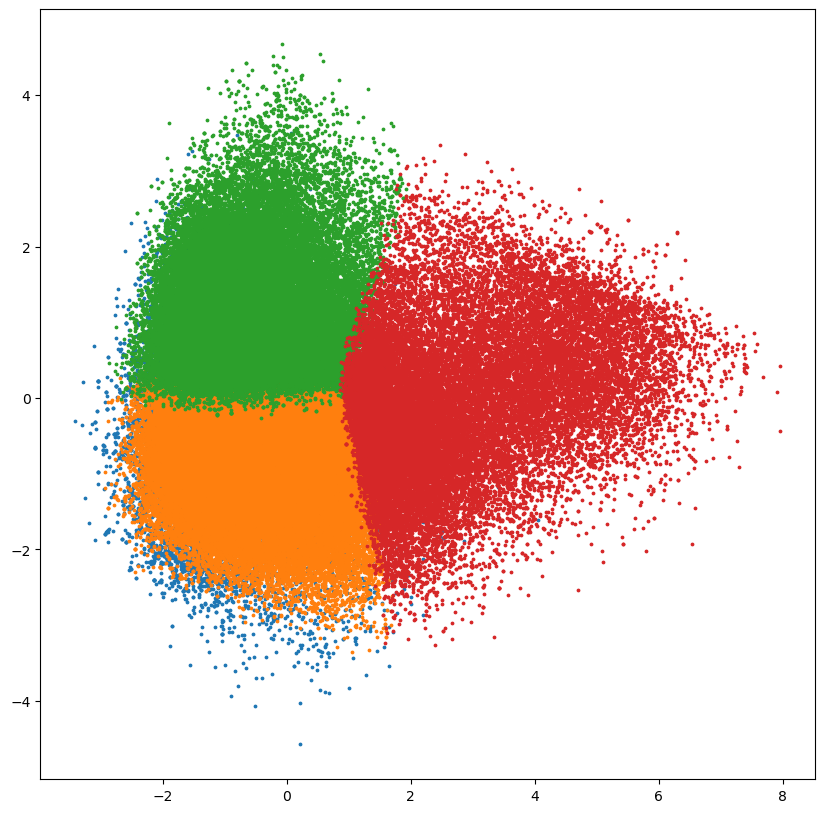

In [87]:
plt.figure(figsize=(10,10))
for c in np.unique(cluster_ids):
    plt.scatter(X_pca[cluster_ids == c, 0], X_pca[cluster_ids == c, 1], marker='.', s=12)

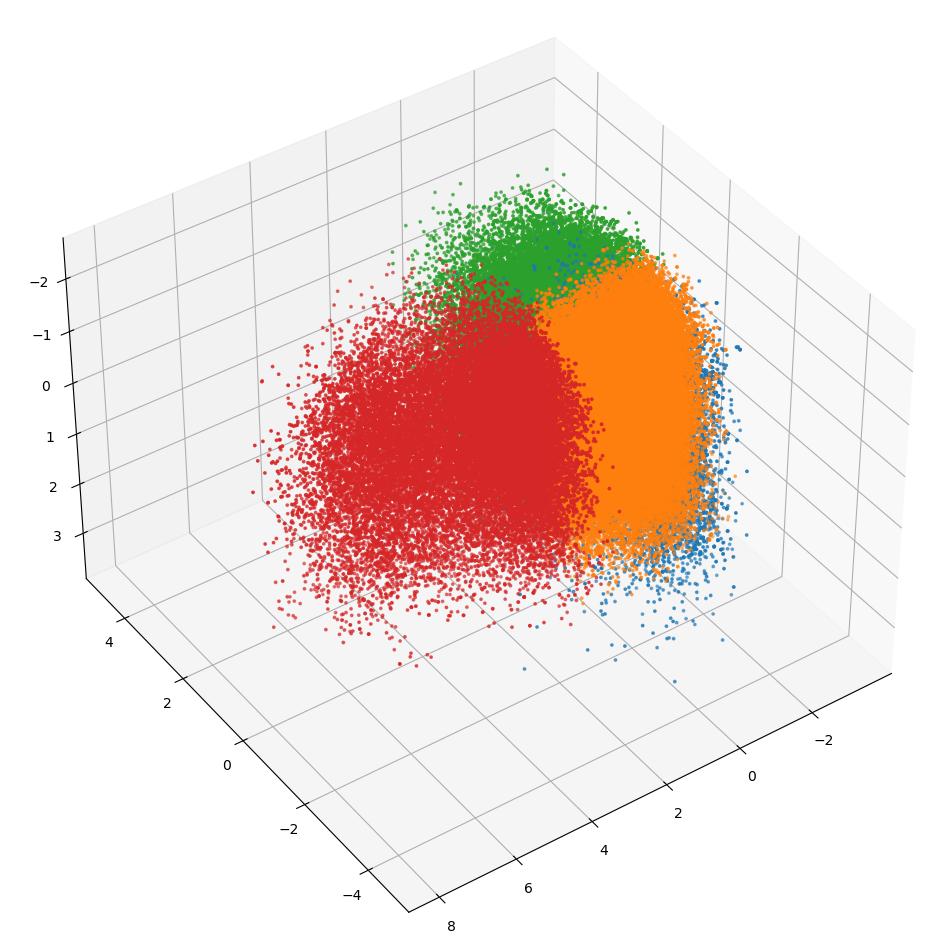

In [88]:

#m3d.figure(figsize=(10,10))
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection='3d')

for c in np.unique(cluster_ids):
    sct = ax.scatter3D(X_pca[cluster_ids == c, 0], X_pca[cluster_ids == c, 1], X_pca[cluster_ids == c, 2], marker='.', s=12)

ax.view_init(-140, 125)



In [89]:
cluster_ids = KMeans(n_clusters=20, n_init=10).fit_predict(X_normalized)

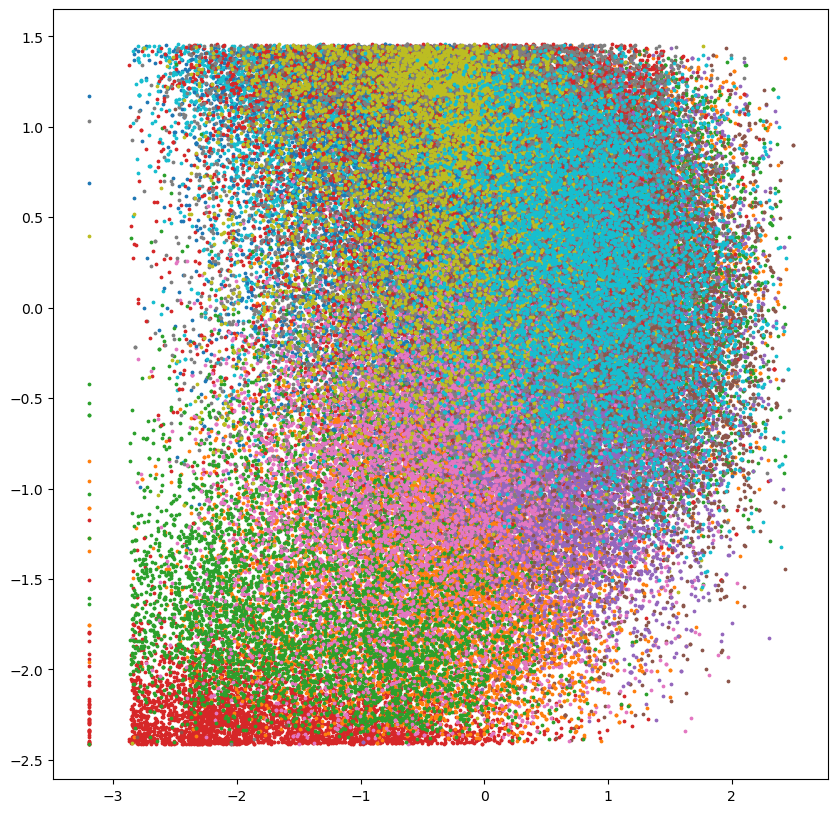

In [90]:
plt.figure(figsize=(10,10))
for c in np.unique(cluster_ids):
    plt.scatter(X_normalized[cluster_ids == c, 0], X_normalized[cluster_ids == c, 1], marker='.', s=12)
